In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from scipy import stats  # 과학용 계산 라이브러리

df = pd.read_csv("diabetes.csv",index_col=0)

In [13]:
# 데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [14]:
# 컬렴명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
# 결측치 확인
(df == 0).sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
# 결측치 제거
# Outcome 열을 제외한 나머지 열에서 0이 포함된 행을 제거
df = df[(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] != 0).all(axis=1)]

# 결과 출력
print(df.shape)  # 0 값이 제거된 후의 데이터 크기 확인

(392, 8)


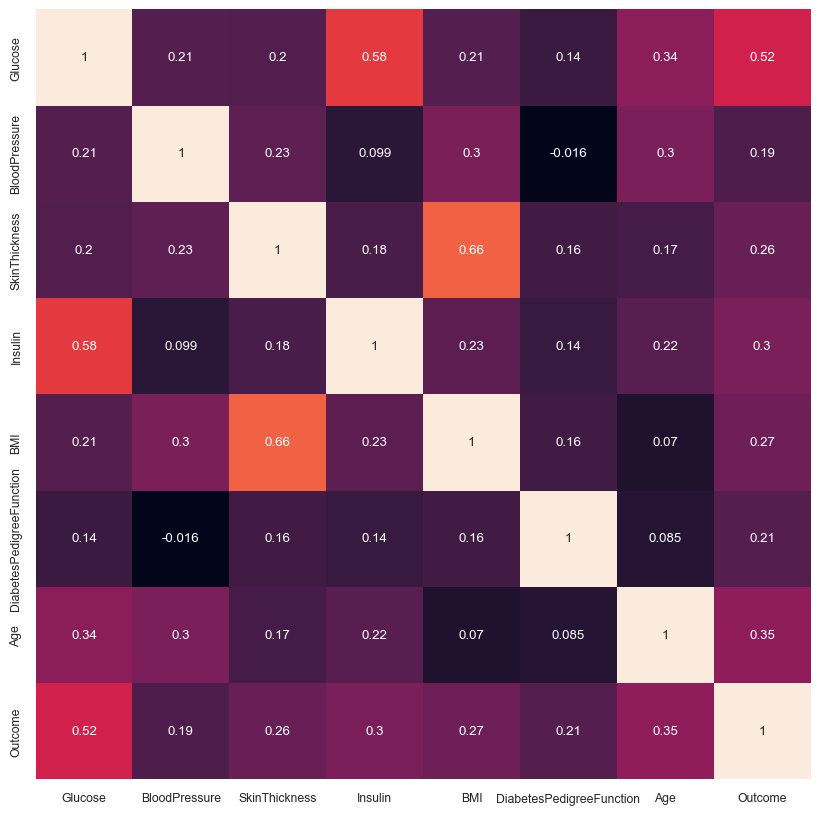

In [17]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 높은 건 Skin Thinckness

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X = df.drop(['Outcome', 'BMI'] ,axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33
3,78,50,32,88,0.248,26
2,197,70,45,543,0.158,53
1,189,60,23,846,0.398,59


In [20]:
y = df["BMI"]
y.head()

Pregnancies
1    28.1
0    43.1
3    31.0
2    30.5
1    30.1
Name: BMI, dtype: float64

## One - Hot Encoding

In [21]:
Y = pd.get_dummies(y).values

In [22]:
# 딥러닝을 위해 numpy로 변환

X = X.values

In [23]:
X

array([[8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 1.670e-01, 2.100e+01],
       [1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 2.288e+00, 3.300e+01],
       [7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 2.480e-01, 2.600e+01],
       ...,
       [8.800e+01, 5.800e+01, 2.600e+01, 1.600e+01, 7.660e-01, 2.200e+01],
       [1.010e+02, 7.600e+01, 4.800e+01, 1.800e+02, 1.710e-01, 6.300e+01],
       [1.210e+02, 7.200e+01, 2.300e+01, 1.120e+02, 2.450e-01, 3.000e+01]])

In [24]:
y

Pregnancies
1     28.1
0     43.1
3     31.0
2     30.5
1     30.1
      ... 
0     43.3
1     36.5
2     28.4
10    32.9
5     26.2
Name: BMI, Length: 392, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((313, 6), (313, 194), (79, 6), (79, 194))

In [29]:
# 모델 정의 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(8,input_shape=(6,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 56        
                                                                 
 dense_5 (Dense)             (None, 30)                270       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
_________________________________________________________________


In [30]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.00

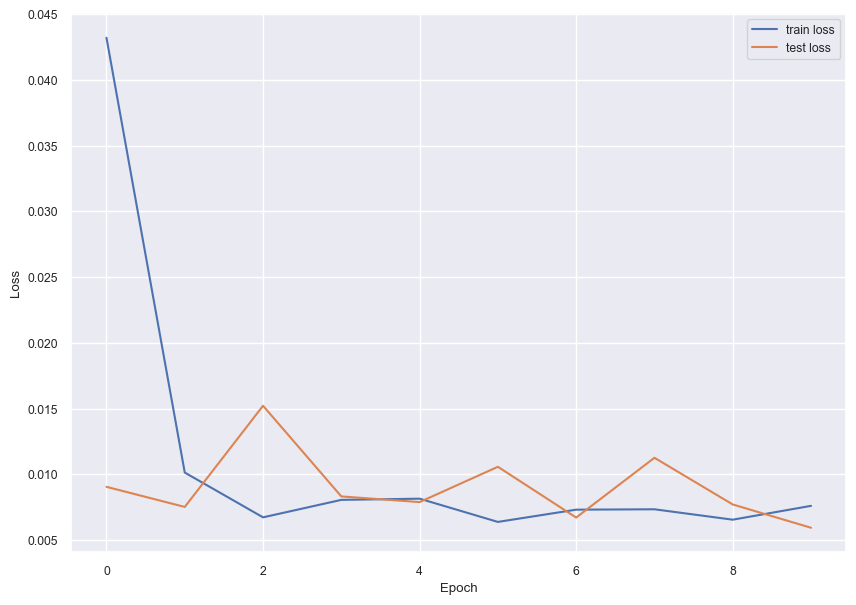

In [31]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()